# Energy and Power Spectral Densities 

## Preliminaries

In this notebook, we will consider energy and power signals. The enery $\mathcal{E}_x$ of a signal, possibly complex valued, is defined as 
$$
\mathcal{E}_x = \int_{-\infty}^{\infty} |x(t)|^2 dt 
$$
and the total (average) power of signal is defined as
$$
\mathcal{P}_x = \lim_{T \mapsto \infty} \dfrac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 dt 
$$
A signal $x(t)$ is called an energy signal if 
$$
0 < \mathcal{E}_x < \infty 
$$ 
and a power signal if 
$$
0 < \mathcal{P}_x < \infty 
$$
The Fourier transform $X(f) = \mathcal{F}[x(t)]$ of a signal $x(t)$ is defined as 
$$
X(f) = \mathcal{F}[x(t)] = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} dt 
$$
and the inverse Fourier transform $x(t) = \mathcal{F}^{-1}[X(f)]$ is defined as 
$$
x(t) = \mathcal{F}^{-1}[X(f)] = \int_{-\infty}^{\infty} X(f) e^{j 2 \pi f  t} df  
$$
For an energy $x(t)$, Parseval's theorem states that, 
$$
\int_{-\infty}^{\infty} |x(t)|^2 dt = \int_{-\infty}^{\infty} |X(f)|^2 df = \mathcal{E}_x 
$$
Since the integration of $|X(f)|^2$ gives us the total energy, $\Psi(f) = |X(f)|^2$ is called energy spectral density. It gives the total energy of in a frequency band. Thus, we can write 
$$
\Psi(f) = |X(f)|^2 \quad \text{and} \quad \mathcal{E}_x = \int_{-\infty}^{\infty} \Psi(f) df 
$$
Similarly, for a power signal $x(t)$, we can write 
$$
\mathcal{P}_x = \lim_{T \mapsto \infty} \dfrac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 dt = 
\lim_{T \mapsto \infty} \dfrac{1}{T} \int_{-\infty}^{\infty} |x(t)|^2 dt =
\lim_{T \mapsto \infty} \dfrac{1}{T} \int_{-\infty}^{\infty} |X(f)|^2 df = 
\int_{-\infty}^{\infty} \lim_{T \mapsto \infty} \dfrac{1}{T} |X(f)|^2 df
$$
Similar to the preivous case as the integration of $\lim_{T \mapsto \infty} \dfrac{1}{T} |X(f)|^2$ gives the total averrage power $\mathcal{P}_x$, $S_n(f) = \lim_{T \mapsto \infty} \dfrac{1}{T} |X(f)|^2$ is called as the power spectral density. 

In the remainin part of this notebook, we will consider energy and power signals, particularly, the relations between the frequency spectrum, energy and energy spectrum density of an energy signal, power and power spectrum of a power signal. 

## Energy and Energy Spectral Density 

The energy signal to be considered is a pulse signal given by, 

$$
p(t) = 
\begin{cases}
A & 0 \leq t \leq T  \\ 
0 & otherwise
\end{cases} 
$$

where $A$ is the amplituede and $T$ is the duration of the pulse. Let us plot the waveform first. 

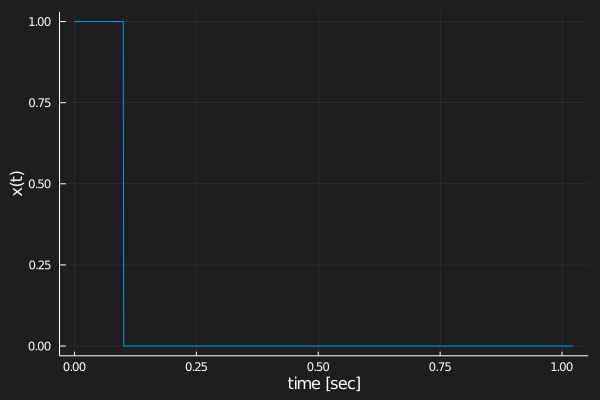

In [18]:
# Load required package for plotting 
using Plots

# Define pulse function 
A = 1.          # Amplitude 
T = 1 / 10.     # Duration 
p(t) = 0 <= t <= T ? A : 0.

# Sample the pulse signal
fs = 1000                   # Sampling frequency 
ts = 1 / fs                 # Sampling period 
l = 2^10                    # Number of samples 
t = (0 : l - 1) * ts        # Time vector 
x = p.(t)                   # Sampled signal 

# Plot 
plot(t, x)
xlabel!("time [sec]")
ylabel!("x(t)")

Now, let us compute the frequency spectrum of the signal using the data samples `x`. 

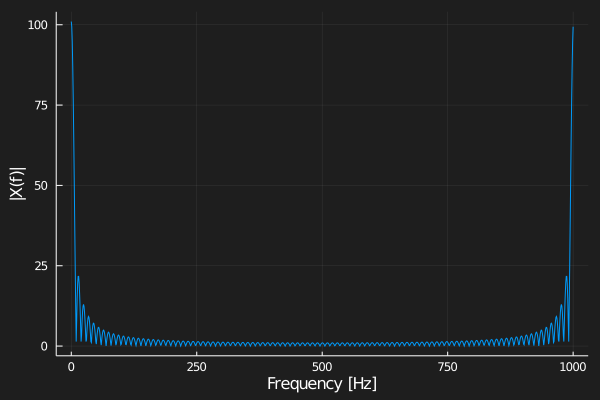

In [14]:
# Load the required package for FFT calculation 
using FFTW  

# Compute frequecy spectrum 
xf = fft(x)

# Compute power spectral density 
psd = abs.(xf)

# Compute the frequency range for plotting 
ff = (0 : 1 / (l - 1) : 1) * fs

# Plot 
plot(ff, psd)  
xlabel!("Frequency [Hz]")
ylabel!("|X(f)|")


Before going on we will consider some justificiations. The theoretical frequency spectrum of the pulse $p(t)$ defined above (whose amplitude is $A$ and duration is $T$), is given by 

$$
P(f) = A T sinc(fT)
$$

where $sinc$ is defined as 

$$ 
sinc(t) = \dfrac{sin(\pi t)}{\pi t}
$$

This is the spectrum of the continuous time signal $p(t)$. The signal we plotted and computed its frequency spectrum is the discrete time signal `x`. The discrete time signal has been obtained by sampling the continuous time signal $p(t)$ with a sampling frequency $fs = 100 Hz$. The sampling a continuous time signal with a sampling frequency of `fs` makes the spectrum of the continuous time signal be shifted on the right and left, and be scaled vertically with the scaling factor `fs`. Thus the frequency spectrum of the signal discrete signal is given by 

$$
X(f) = \dfrac{A T}{T_s} sinc(fT)
$$

where $T_s$ = `1 / fs`  is the sampling period. Note that in our case, $A=1, T_s = 0.001, T = 0.1$. Thus, the maximum value of `sinc` function in the spectrum of the discrete time signal `x` is about `100`, as expected. 

Note also that the frequency spectrum $X(f)$ of the discrete time signal `x` is periodic witht a period of `fs`. That is, the spectrum `X(f)` repeats itself in intervals of duration of `fs`. In the plot above we plot the spectrum for an interval of `[0, fs]`. This is a single side spectrum. Double side spectrum can also be plotted as shown below. For this double side spectrum, the frequency vector must be defined accodingly. We use `fftshift` function to shift the spectrum on the negative frequencies and define the frequency interval as `[-fs/2, fs/2]`

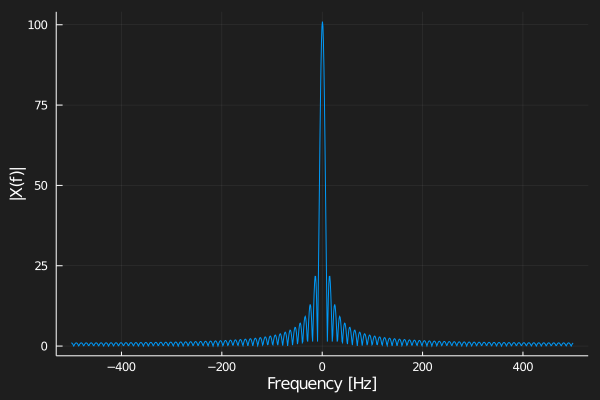

In [15]:
psd2 = fftshift(psd) 
ff2 = -fs / 2 : fs / (l - 1) : fs / 2 
plot(ff2, psd2)
xlabel!("Frequency [Hz]")
ylabel!("|X(f)|")

The signal $p(t)$ is an energy signal since it has nonzero and finite energy. Its energy can be computed as 
$$ 
\mathcal{E}_p = \int_{-\infty}^{\infty} |p(t)|^2 dt = \int_{0}^{T} A^2 dt = A^2 T 
$$

From Parseval's theorem, we have 

$$
 \mathcal{E}_p = \int_{-\infty}^{\infty} |p(t)|^2 dt = \int_{-\infty}^{\infty} |P(f)|^2 dt
$$

where $P(f)$ is the frequency spectrum of $p(t)$. Since the integral on the right-hand side gives the signal energy, the quantity $ \Psi_p(f) = |P(f)|^2$ is called as the energy density function. Thus, the total energy of an energy signal can be computed both in the time domain and in the frequency domain. Below, we compute the total energy of $p(t)$ and compate them.

In [21]:
Δf = fs / (l - 1)                       # Resoluion in the frequency domain 
Δt = ts                                 # Resolution in the time domain
Et = sum(abs.(x).^2) * Δt               # Energy calculated in the time domain 
Ef = sum(abs.(xf).^2) * Δf / (fs^2)     # Energy calculated in the frequency domain 
@show Et, Ef    
nothing


(Et, Ef) = (0.101, 0.10109872922776145)


From the results given above the calculation given above both in the time domain (Et = 0.101) and in the frequency domaion (Ef = 0.10109872922776145) is quite near the theoretical value (0.01). 

Note that the integrals defined in above for the signal energies are defined for continous time signals. Since we have sampled values `x` of a continuous time signal $p(t)$, we need to perform this integration in the discrete time. First we recall that the integral given as 
$$
I = \int_{0}^{T} f(t) dt \approx \sum_{k = 0}^{N - 1} f[k] \Delta t_k
$$
where $f[k]$'s are the samples of the continous time signal $f(t)$ sampled at instants $t_k$. Considering a uniform partitioning of the integral domain $[0, T]$, we can write $t_k = k \Delta t, \; k = 0, \ldots, N - 1$. where
$$
\Delta t = \dfrac{T}{N - 1}
$$
It is clear that the resolution $\Delta k$ for the time domain is the samling period `ts`. Note that the frequency range `[0, fs]` has been divided in to $l - 1$ intervals. Thus, the resolution in the frequency domain is $fs / (l -1)$. From these considerations, signal energies can be computed as illustrated above. 

Finally, note the division by $f_s^2$  while calculating the energy in the frequency domain. This is bacause we want to calculate the energy of the continous time signal $p(t)$, but we use the frequency spectrum $X(f)$ which is the spectrum of the discrete time signal `x`. The relation between the frequency spectrum $P(f)$ of the continous time signal $x(t)$ and the frequency spectrum $X(f)$ of the signal `x` is given as 
$$
    X(f) = P(f)  fs
$$
Hence, we have, 
$$
    |X(f)|^2 = |P(f)|^2 f^2 \quad  \Rightarrow \quad |P(f)|^2 = \dfrac{|X(f)|^2}{fs^2} 
$$

# Power and Power Spectral Density 

The power signal we will consider in this section is an infinite duration sinusoidal signal defined as 
$$
x(t) = cos(2\pi f t) 
$$
where $f$ is the frequency of the signal. $x(t)$ is a periodic signal with period $T = 1 / f$, and its average power $\mathcal{P}_x$ can be calculated as 
$$
\mathcal{P}_x = \int_{-\infty}^{\infty} |x(t)|^2 dt = 0.5
$$

Let us plot the signal $x(t)$ in the time domain first. 

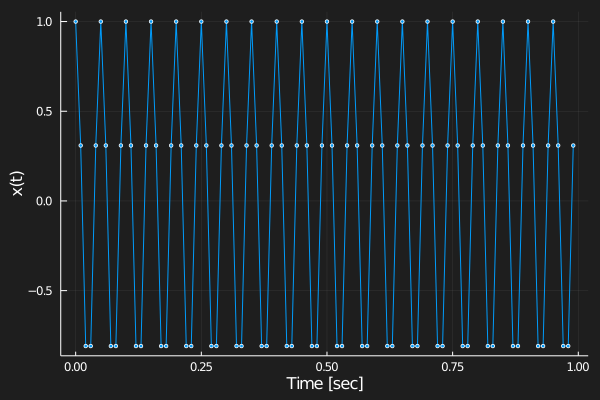

In [6]:
# Load required packages 
using FFTW 
using Plots 

# Construct the signal
f = 20                      # Signal freqyuency
fs = 100                    # Sampling frequency 
l = 2^10                    # Number of samples
ts = 1 / fs                 # Sampling period 
t = (0 : l -1) * ts         # Time vector 
x = cos.(2π * f * t)        # Signal samples 

# Plots 
plot(t[1:100], x[1:100], marker=(:circle, 2)) 
xlabel!("Time [sec]") 
ylabel!("x(t)") 

The next step is to compute its Fourier transform

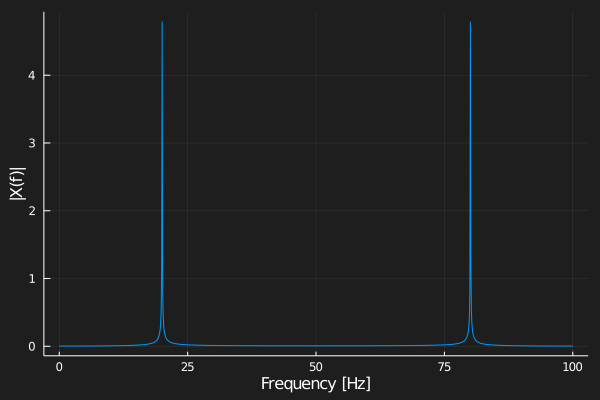

In [9]:
# Compute fft
xf = fft(x) * ts                # Fourier transform 
ff = 0 : fs / (l - 1) : fs      # Frequency vector 

# Plots
plot(ff, abs.(xf))
xlabel!("Frequency [Hz]") 
ylabel!("|X(f)|")

Note that we computed the Fourier transform $X(f)$ from the samples $x[n]$ of continuous time signal $x(t)$. The Fourier transform $X(f)$ is periodic with the samling frequency $f_s$. Hence, we plotted just a single period of the magnitude spectrum $|X(f)|$ over the interval $[0, f_s]$. 

For the sampled signal $x[n]$, we can write $x[n] = x(n T_s)$ where $T_s = 1 / f_s$ is the sampling period. $x[n]$ can be view as the multiplication of the continuous time signal $x(t)$ with an impulse train signal $p(t)$ defined as
$$
p(t) = \sum_{n = -\infty}^{\infty} \delta(t - n T_s)
$$
where $\delta(t)$ is the impulse function defined as 
$$
\delta(t) = 
\begin{cases}
\infty & t = 0 \\
0 & otherwise 
\end{cases}
$$
Hence, we can write 
$$
x[n] = x(n T_s) = p(t)x(t) \quad \Rightarrow \quad X(f) = P(f) * X(f)
$$
where $*$ denotes the convolution operation. $P(f)$ can found as 
$$
P(f) = \dfrac{1}{T_s} \sum_{n = -\infty}^{\infty} \delta(f - n fs)
$$
Hence the frequency spectrum $X_s(f)$ of the sampled signal $x[n]$ can be written as 
$$
X_s(f) = \dfrac{1}{Ts} \sum_{n = -\infty}^{\infty} X(f - n fs)
$$
Note that the spectrum $X_s(f)$ is periodic with a period of the sampling frequency. In the plot above, we computed just a single period of a frequency range of $[0, f_s]$. Thus, to get the frequency spectrum $X(f)$ of the continuous time sigal $x(t)$, we scaled $X_s(f)$ by the smapling period `ts`.

We computed the frequncy spectrum $X(f)$ of the signal $x(t)$. Now can compute the power spectral density $\mathcal{P}_x(f)$ as follows

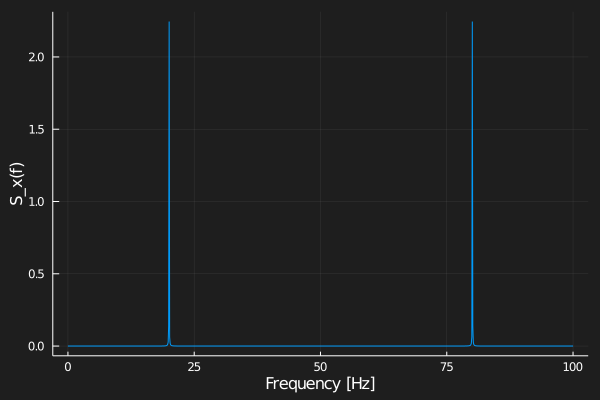

In [13]:
# Compute power 
psd = abs.(xf).^2 / (l - 1) / ts

# Plots 
plot(ff, psd)
xlabel!("Frequency [Hz]") 
ylabel!("S_x(f)") 

Note that the power spectral density $S_x(f)$ is defined as 
$$
S_x(f) = \lim_{T \mapsto \infty} \dfrac{1}{T} |X(f)|^2
$$

and $T = (l - 1) T_s$, we can compute $S_x(f)$ numerically as follows
$$
S_n(f) \approx \dfrac{1}{T} |X(f)|^2 = \dfrac{1}{(l - 1)T_s} |X(f)|^2
$$
and we compute $S_n(f)$ like this in the above code.

The total average power $\mathcal{P}_x$ can now be computed by evaluting the integral of the power spectal density $S_x(f)$ over the total interval $[0, f_s]$,i.e., 
$$
\mathcal{P}_x = \int_{-\infty}^{\infty} S_x(f) df = \int_{0}^{f_s} S_x(f) df 
$$

The integration above can be computed numerically as follows, 
$$
\mathcal{P}_x = \sum_{n = 1}^{l - 1} S_x[n] \Delta f
$$
where $\Delta f = \dfrac{f_s}{l - 1}$ is the frequency resolution of the `fft` operation. Hence for the purpose of  comparison, we compute the average power in both in the frequency domain and in the time domain.

In [14]:
# Compute power 
Δf = fs / (l - 1) 
Pf = sum(psd) * Δf              # Average power calculated in time 
Pt = sum(abs.(x).^2) / (l - 1)  # Average power calculated in frequency
@show Pf, Pt

(Pf, Pt) = (0.5013737953760669, 0.50088417252902)


(0.5013737953760669, 0.50088417252902)

Note that the results are quite approximate to the theoretical value of the total average power of the signal $x(t)$, which is calculated to be $0.5$.